In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [25]:
xl_1 = 0.5 
yl_1 = 0

xl_2 = 4.1
yl_2 = 3.4

xc_1 = 2.5
yc_1 = 2.
rc = 0.4

In [27]:
np.abs(0.4)

0.4

In [222]:
def sgn(x):
    if x < 0:
        return -1
    else:
        return 1

def obtain_intersection_points(x1, y1, x2, y2, xc, yc, rc):
    # https://mathworld.wolfram.com/Circle-LineIntersection.html
    x1n = x1 - xc
    x2n = x2 - xc

    y1n = y1 - yc
    y2n = y2 - yc

    dx = x2n - x1n
    dy = y2n - y1n

    dr = np.sqrt(dx**2 + dy ** 2)
    D = x1n * y2n - x2n * y1n

    delta = rc ** 2 * dr **2 - D ** 2

    if delta >= 0:
        xi1 =  (D*dy + sgn(dy) * dx  * np.sqrt( delta )) / (dr ** 2) 
        yi1 =  - ( D * dx - np.abs(dy) *  np.sqrt( delta ) ) / (dr ** 2) 

        xi2 =  (D*dy - sgn(dy) * dx  * np.sqrt( delta )) / (dr ** 2) 
        yi2 =  - ( D * dx + np.abs(dy) *  np.sqrt( delta ) ) / (dr ** 2)

        dis1 = np.sqrt( ( (xi1 + xc - x1) **2 ) + ( ( yi1 + yc - y1)**2) )
        dis2 = np.sqrt( ( (xi2 + xc - x1) **2 ) + ( ( yi2 + yc - y1)**2) )

        if dis2 > dis1:
            return True, [xi1 + xc, yi1 + yc]
        else:
            return True, [xi2 + xc, yi2 + yc]
    else: 
        return False, -1

def validate_point(x, y, xo, yo, th, max_range):
    th = np.deg2rad(th)
    # Check if it is the same direction
    if sgn(y) != sgn(np.sin(th)):
        return False
    elif sgn(x) != sgn(np.cos(th)):
        return False
    # Check it is within the range
    elif np.sqrt(x**2 + y**2) > max_range :
        return False
    
    elif np.sqrt(x**2 + y**2) > np.sqrt(xo**2 + yo**2):
        return False
    else:
        return True

In [202]:
validate_point(0,5,45,5)

True

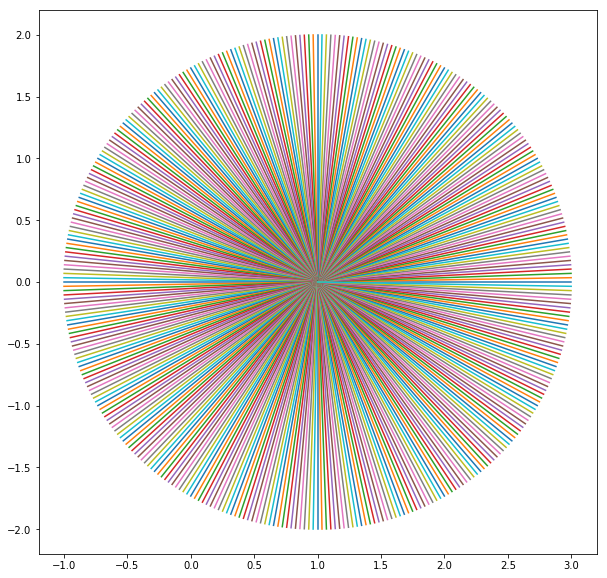

In [244]:
def obtain_scan(xr, yr, min_range, max_range):
    r = max_range
    xls = []
    yls = []
    for th in np.arange(0,360, 1):
        thr = np.deg2rad(th)
        xls.append(xr + r * np.cos(thr))
        yls.append(yr + r * np.sin(thr))   
    return xls, yls

xr = 1.
yr = 0

MAX_RANGE = 2

xls, yls = obtain_scan(xr, yr, 0, MAX_RANGE)

f, ax = plt.subplots(figsize=(10,10))
for xl, yl in zip(xls, yls):
    ax.plot([xr, xl] ,[yr, yl])
    

0.061586856842


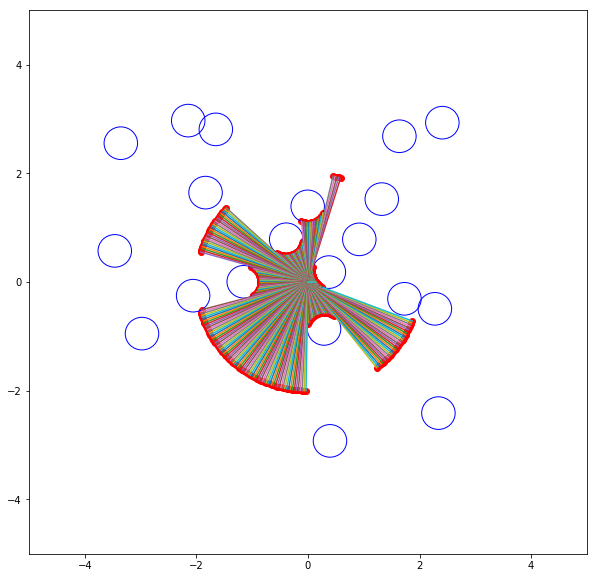

In [278]:
start = time.time()
xr = 0.
yr = 0

xls, yls = obtain_scan(xr, yr, 0, MAX_RANGE)
xcs, ycs, rcs = get_random_obstacles(n = 20)

# xl1 = xls[20]
# yl1 = yls[20]

# xc = xcs[0]
# yc = ycs[0]
# rc = rcs[0]

ths = np.arange(0,360, 1)

for i, (xl, yl, th) in enumerate(zip(xls, yls, ths)):
    for xc, yc, rc in zip(xcs, ycs, rcs):   
        is_inter, result = obtain_intersection_points(xr, yr, xl, yl, xc, yc, rc) 
        if is_inter:
            cond = validate_point(result[0] - xr, result[1] - yr, xls[i] - xr, yls[i] - yr, th, MAX_RANGE)
            if cond:
                xls[i] = result[0]
                yls[i] = result[1]

print(time.time() - start)

f, ax = plt.subplots(figsize=(10,10))
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.scatter( xls, yls , color = 'r')
for xc, yc, rc in zip(xcs, ycs, rcs):
    circle = plt.Circle((xc, yc), rc, color='b', fill=False)
    ax.add_patch(circle)
for xl, yl in zip(xls, yls):
    ax.plot([xr, xl] ,[yr, yl])
    


In [246]:
import time

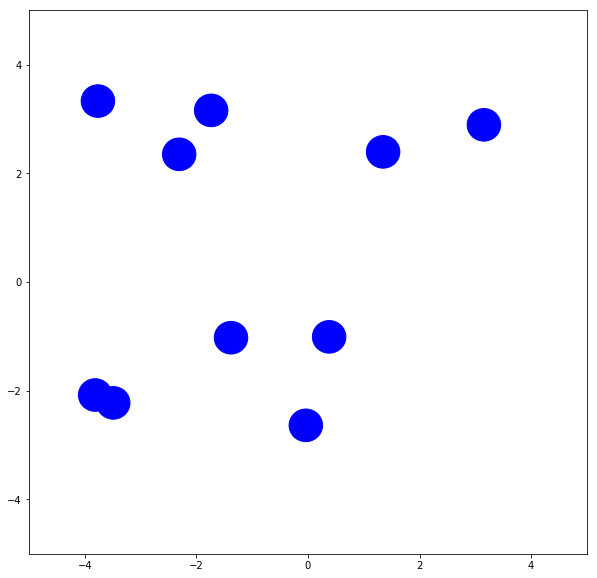

In [119]:
def get_random_obstacles(n = 10, min_x = -4, max_x = 4, min_y = -4, max_y = 4, r = 0.3):
    xcs = np.random.uniform(low = min_x, high = max_x, size = n)
    ycs = np.random.uniform(low = min_y, high = max_y, size = n)
    rcs = np.array( n * [r] )
    return xcs, ycs, rcs

xcs, ycs, rcs = get_random_obstacles()
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
for xc, yc, rc in zip(xcs, ycs, rcs):
    circle = plt.Circle((xc, yc), rc, color='b', fill=True)
    ax.add_patch(circle)



array([-1.46240784,  2.8468527 , -1.10755596,  0.104836  ,  2.96269333,
        1.12421375,  1.97712161, -2.44287564, -1.40444358, -2.87892746])

In [136]:
flag, result = obtain_intersection_points(xl_1, yl_1, xl_2, yl_2, xc_1, yc_1, rc)
xi1, yi1 = result[0], result[1]
print(' {}, {} // {} , {} '.format(xi1, yi1, xi2, yi2))

 2.34541635183, 1.74289322117 // 2.27065135171 , 1.67228183217 


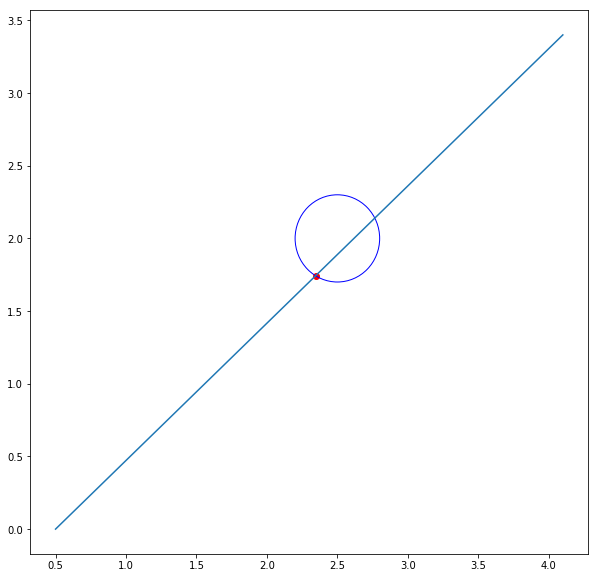

In [137]:
circle = plt.Circle((xc_1, yc_1), rc, color='b', fill=False)
f, ax = plt.subplots(figsize=(10,10))
ax.plot([xl_1, xl_2] ,[yl_1, yl_2])
ax.add_patch(circle)
ax.scatter( (xi1), (yi1) , color = 'r')
